# Time Series Model
(Explanatory models xxx)

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('./train.csv')
train

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0
...,...,...,...,...,...,...,...,...,...
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0


Text(0, 0.5, 'power')

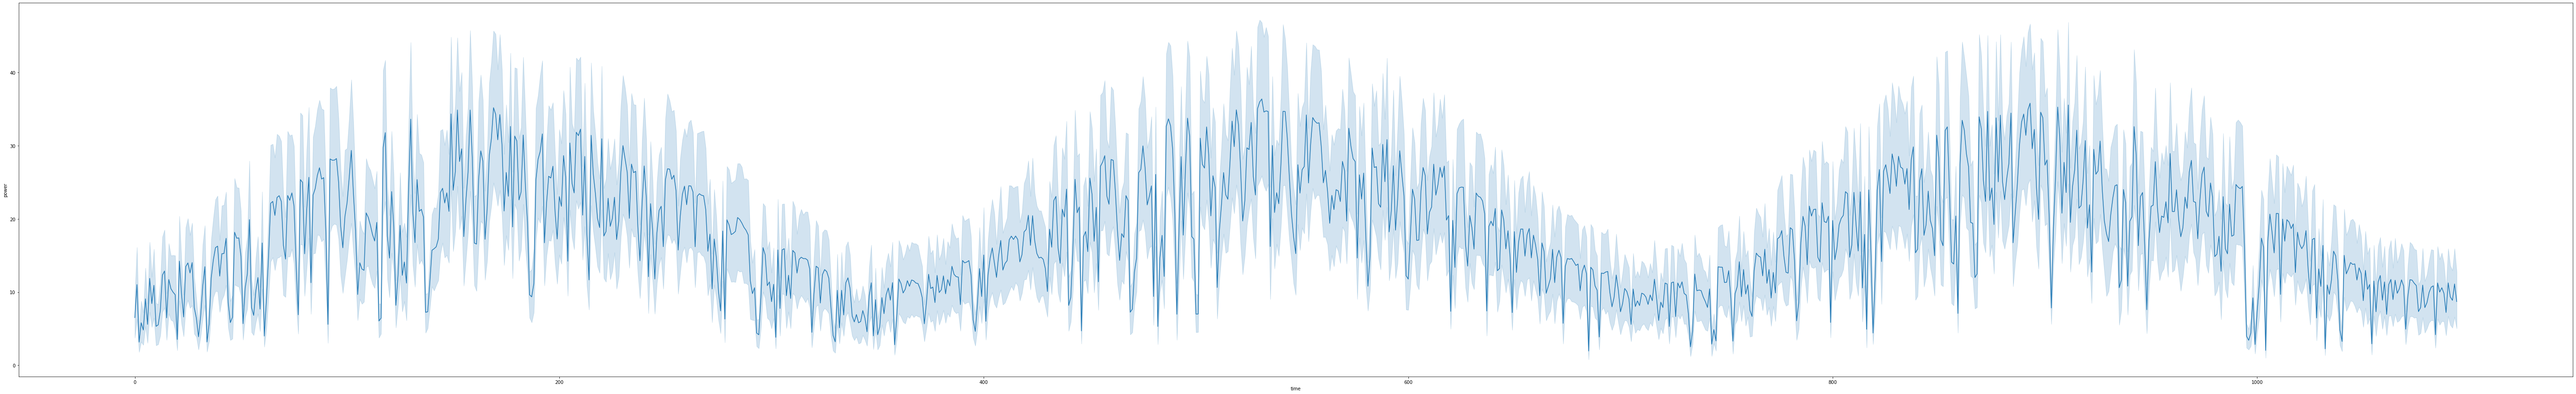

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(100, 15))
sns.lineplot(y=train['TARGET'], x=train['Day'])
plt.xlabel('time')
plt.ylabel('power')

In [4]:
df = train[['Day', 'TARGET']]
df

,Day,TARGET
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
52555,1094,0.0
52556,1094,0.0
52557,1094,0.0
52558,1094,0.0


In [5]:
day = []
target_sum=[]
for i in range(0,1095):
    df_test = df.loc[df['Day']==i]
    target = df_test['TARGET'].sum()
    day.append(i)
    target_sum.append(target)
df1 = pd.DataFrame(day, columns=['Day'])
df2 = pd.DataFrame(target_sum, columns=['TARGET'])
re_df = pd.concat([df1, df2], axis=1)
re_df

,Day,TARGET
0,0,312.996029
1,1,529.208849
2,2,151.942952
3,3,278.918759
4,4,231.229091
...,...,...
1090,1090,540.539018
1091,1091,448.758053
1092,1092,426.034991
1093,1093,533.480207


Text(0, 0.5, 'power')

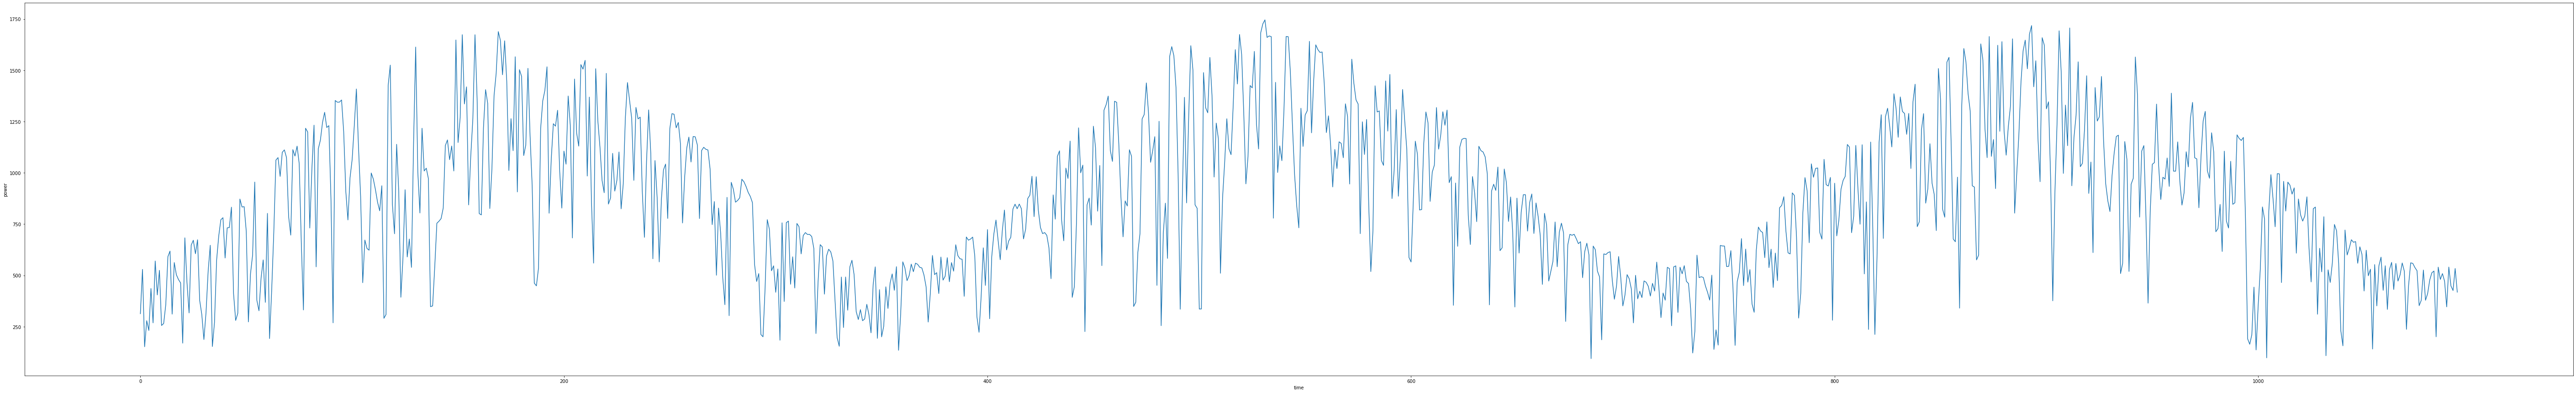

In [6]:
plt.figure(figsize=(100, 15))
sns.lineplot(y=re_df['TARGET'], x=re_df['Day'])
plt.xlabel('time')
plt.ylabel('power')

In [7]:
re_df = re_df.set_index('Day')
re_df

,TARGET
Day,
0,312.996029
1,529.208849
2,151.942952
3,278.918759
4,231.229091
...,...
1090,540.539018
1091,448.758053
1092,426.034991


In [8]:
def plot_rolling(data, interval):
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()
    return rolmean, rolstd

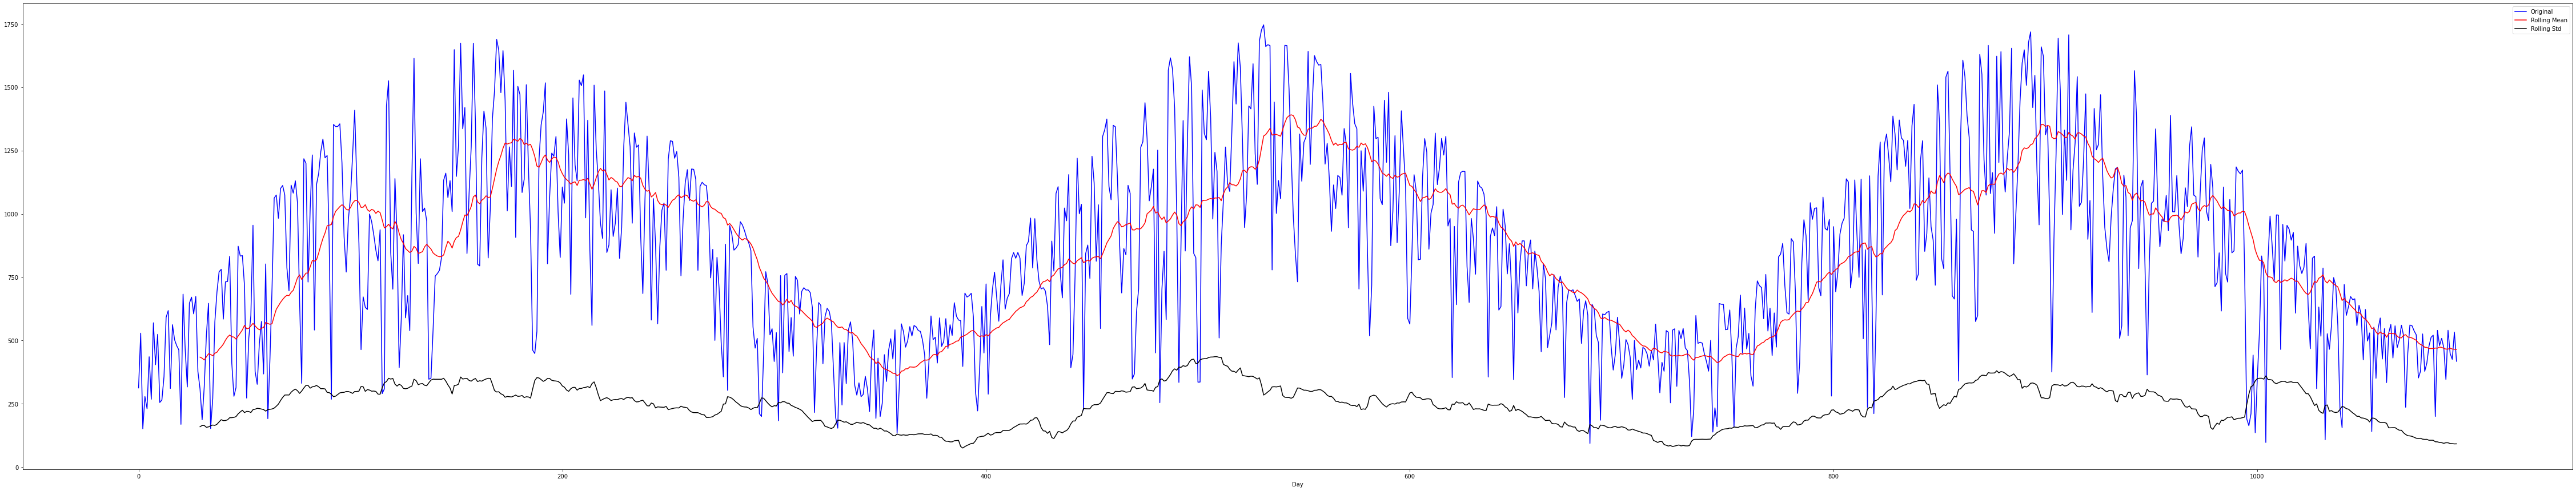

In [9]:
rolmean, rolstd = plot_rolling(re_df, 30)

#Plot rolling statistics:
plt.figure(figsize=(80, 15))
plt.xlabel('Day')

plt.plot(re_df, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.show()

In [10]:
# 정상성(stationarity)을 나타내는 시계열은 시계열의 특징이 해당 시계열이 관측된 시간에 무관합니다.15 따라서, 추세나 계절성이 있는 시계열은 정상성을 나타내는 시계열이 아닙니다 
# 추세가 있다는 것은 평균이 시간에 따라 변한다는 것이므로 정상 시계열로 볼 수 없다. 그러면 정상 시계열화 하기 위해 1차 차분을 해보자.

In [11]:
# ADF 검정(단위근 검정) -> 한번 차분했더니 비정상성이 없어짐
from statsmodels.tsa.stattools import adfuller

y = re_df['TARGET']
y_1diff = re_df.diff().dropna()['TARGET']
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y_1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

원 데이터 ADF Statistic: -2.263
원 데이터 p-value: 0.184
1차 차분 ADF Statistic: -13.144
1차 차분 p-value: 0.000


In [12]:
# 차분을 하지 않은 원 데이터는 p-value가 유의 수준인 0.05보다 크므로 정상 시계열로 볼 수 없다.
# 이에 비해 1차 차분의 데이터는 p-value가 유의 수준보다 작으므로 정상 시계열로 볼 수 있다.
# 이로서 차분(d)의 차수는 1인 ARIMA(p, 1, q)의 모델 구축이 필요하다는 것을 알 수 있다.

## ARIMA 모델의 구축

In [13]:
# 이제 적절한 AR(p)와 MA(q)를 정해야 하는데, 일반적으로는 ACF (AutoCorrelation Function)와 PACF (Partial AutoCorrelation Function) 그래프를 이용해서 정한다.

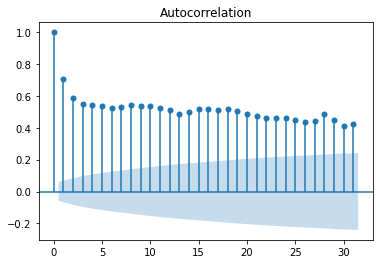

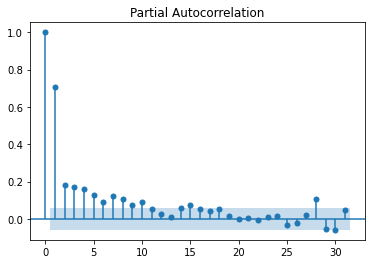

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(re_df)
plot_pacf(re_df)
plt.show()

In [15]:
# AIC를 기준으로 최적의 차수를 정하도록 하겠다. (AIC가 뭔데..?)

In [16]:
from statsmodels.tsa.arima_model import ARIMA

In [17]:
def my_auto_arima(data, order, sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p{p} d{d} q{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)  # 가장 좋은(AIC 가장 낮은)거부터 정렬
    return result_df

In [18]:
my_auto_arima(re_df,[3,3,3])    # 2,1,2가 가장 최적 모델

C:\Users\User\anaconda3\envs\AI_dev_env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\User\anaconda3\envs\AI_dev_env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

,order,AIC
21,p2 d1 q2,15153.070437
20,p2 d1 q1,15157.013791
14,p1 d1 q2,15157.478524
13,p1 d1 q1,15157.723773
5,p0 d1 q2,15159.677541
18,p2 d0 q2,15170.494866
17,p2 d0 q1,15170.785294
11,p1 d0 q2,15172.473552
8,p0 d2 q2,15246.857143
4,p0 d1 q1,15248.437086


In [39]:
model = ARIMA(re_df, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.TARGET   No. Observations:                 1094
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7570.535
Method:                       css-mle   S.D. of innovations            244.796
Date:                Thu, 04 Mar 2021   AIC                          15153.070
Time:                        10:15:19   BIC                          15183.056
Sample:                             1   HQIC                         15164.417
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1930      1.719      0.112      0.911      -3.177       3.563
ar.L1.D.TARGET     1.3354      0.035     37.752      0.000       1.266       1.405
ar.L2.D.TARGET    -0.3483      0.033

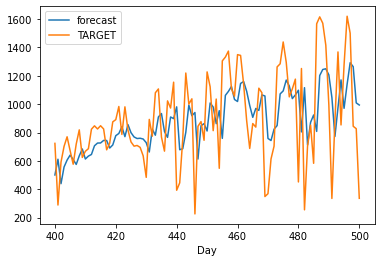

In [41]:
model_fit.plot_predict(start=400, end=500)
plt.show()

In [21]:
# 0일-900일까지의 데이터로 모델을 fitting하고, 901-1094일까지 값을 예측해보자

In [22]:
train, test = re_df.iloc[:900,:], re_df.iloc[901:,:]

In [23]:
test.shape

(194, 1)

In [24]:
model = ARIMA(train,(2,1,2))
model_fit = model.fit()
full_forecast = model_fit.forecast(steps=test.shape[0])   # forecast=predict

C:\Users\User\anaconda3\envs\AI_dev_env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\User\anaconda3\envs\AI_dev_env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse 

In [25]:
print(full_forecast)

(array([1479.11366997, 1420.46527567, 1404.82367882, 1404.03339446,
       1406.17190088, 1407.86268101, 1408.78506868, 1409.26983743,
       1409.5880068 , 1409.86610682, 1410.14444376, 1410.42938732,
       1410.71867497, 1411.00978074, 1411.30139328, 1411.59304931,
       1411.88465264, 1412.17621399, 1412.467756  , 1412.75929192,
       1413.05082693, 1413.3423623 , 1413.63389806, 1413.92543403,
       1414.21697007, 1414.50850612, 1414.80004217, 1415.09157822,
       1415.38311426, 1415.6746503 , 1415.96618634, 1416.25772239,
       1416.54925843, 1416.84079447, 1417.13233052, 1417.42386656,
       1417.7154026 , 1418.00693865, 1418.29847469, 1418.59001073,
       1418.88154677, 1419.17308282, 1419.46461886, 1419.7561549 ,
       1420.04769095, 1420.33922699, 1420.63076303, 1420.92229907,
       1421.21383512, 1421.50537116, 1421.7969072 , 1422.08844325,
       1422.37997929, 1422.67151533, 1422.96305137, 1423.25458742,
       1423.54612346, 1423.8376595 , 1424.12919555, 1424.4207

In [26]:
forecast = pd.DataFrame(full_forecast[0], index=test.index, columns=test.columns)
forecast

,TARGET
Day,
901,1479.113670
902,1420.465276
903,1404.823679
904,1404.033394
905,1406.171901
...,...
1090,1462.320417
1091,1462.611953
1092,1462.903489


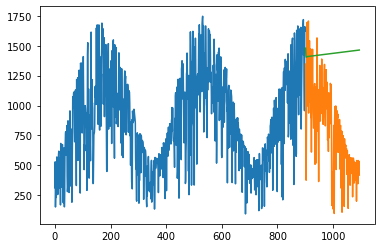

In [27]:
plt.plot(train.iloc[:900,:])
plt.plot(test)
plt.plot(forecast)

# 초록색의 예측선을 보면 알 수 있듯이 마지막 값을 거의 그대로 사용하고 있는 것을 알 수 있다. 얼핏 봐서는 예측에 사용이 어려운 모델로 보인다.
# 이는 모델이 실제의 값(과거)을 바탕으로 바로 다음의 값(현재)을 예측
# 하지만 이렇게 모델을 구축하고 평가하는 단계에서 한단계씩 예측을 할 경우, 성능 좋아짐..?

## 모델 평가

1. 모델의 검증 방법으로는 one-step forecast방법을 사용하였다. (시계열 데이터에는 순서가 존재하기 때문에 cross validation 방법으로는  검증이 불가능)
2. one-step forecast validation : 시간이 지남에 따라 매일매일 업데이트되는 데이터로 모델을 업데이트하고 그다음 날을 예측하는 프로세스를 반복

In [28]:
import warnings
warnings.filterwarnings("ignore")

import datetime

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
re_df

,TARGET
Day,
0,312.996029
1,529.208849
2,151.942952
3,278.918759
4,231.229091
...,...
1090,540.539018
1091,448.758053
1092,426.034991


In [30]:
def step_split(x_sequence, y_sequence, n_steps, n_features, n_forwards, n_predict_steps, test_set=False):
    x_sequence = np.array(x_sequence).reshape(-1, n_features)
    y_sequence = np.array(y_sequence).reshape(-1, 1)

    X, y = list(), list()
    if test_set:
        X = x_sequence[-n_steps:]
        X = np.array(X)
        X = X.reshape(1, n_steps, n_features)
    else:
        end = len(x_sequence) - n_steps - n_forwards - n_predict_steps + 2
        for i in range(end):
            seq_x = x_sequence[i:i+n_steps]
            seq_y = y_sequence[i+n_steps+n_forwards-1:i+n_steps+n_forwards+n_predict_steps-1]
            X.append(seq_x)
            y.append(seq_y)
        X = np.array(X)
        y = np.array(y)
        X = X.reshape(X.shape[0], n_steps, n_features)
        y = y.reshape(y.shape[0], n_predict_steps)
    return X, y

In [31]:
X = re_df[re_df.index >= 0]
y = re_df[re_df.index >= 0]

In [32]:
#LSTM의 학습과 예측 기간 설정
n_steps = 30
training_period = 200 + n_steps
n_features = 1
n_forwards = 1
n_predict_steps = 1

#테스트 기간 설정
end = len(X) - n_steps - training_period
validation_size = 500
start = end - validation_size

In [33]:
yhat_arima_list = list()
y_real_list = list()
predict_index_list = list()

In [34]:
# one-step time series forecast시작
# 학습은 과거 전 구간이 아닌 예측날 기준 512일 이전의 데이터만 학습하도록 하겠다.
    
for i in range(start, end):
    data = X[i:i+training_period+n_steps]
    y_real = X.values[i+training_period+n_steps].item()
    y_real_list.append(y_real)
    predict_index = X.index[i+training_period+n_steps].item()
    predict_index_list.append(predict_index)

In [35]:
#SARIMA모델 정의와 학습

sarima_model = SARIMAX(data.values, order=(2,1,2), seasonal_order=(2, 1, 2, 12), trend='c', enforce_stationarity=False, enforce_invertibility=False)
# order(p,d,q), seasonal_order(p,d,q,주기), trend=n/c/t/ct...

model_fit = sarima_model.fit()
sarima_forecast = model_fit.forecast(1).item()
yhat_arima_list.append(sarima_forecast)

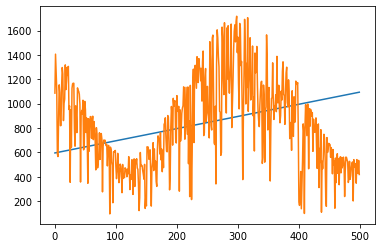

In [36]:
plt.plot(predict_index_list)
plt.plot(y_real_list)
plt.plot(yhat_arima_list)
plt.show()

In [37]:
result_df = pd.DataFrame(list(zip(y_real_list, yhat_arima_list)),columns=['y','arima'],index=predict_index_list)
col_list = ['arima']
for col in col_list:
    mse = mean_squared_error(result_df['y'], result_df[col])
print(f'{col} error: {mse}')

arima error: 428327.6198973655
